Tarea IV

AdvNNs

17 de noviembre de 2025

Resumen

El objetivo de esta tarea es continuar trabajando en el proyecto final. Por favor, suba sus soluciones en un archivo comprimido a Classroom antes del 25 de noviembre.

Problema 1

Describa los siguientes puntos clave de su proyecto (puede agregar algunos gráficos a su respuesta):

a) ¿Su modelo presenta un alto sesgo (high bias)? Si es así, ¿cómo planea lidiar con ello?

Mi modelo logra una precisión del 75.82% en el conjunto de entrenamiento, lo que quiere decir que esta aprendiendo patrones interesantes de los datos, sin embargo la complejidad de 22 clases hace del problema un problema que es complejo y dificil de entrenar lo que podría probar para mejorar es:

- Probar una arquitectura más compleja como un VGT, por ejemplo. 
- Incrementar la cantidad de los datos haciendo un aumento de datos o 
buscando más imagenes de deportes en internet para el entendimiento de patrones mejorado para mi modelo.
- Mejorar el procesamiento, quizá aplicar más tecnicas de aumento de datos.

b) ¿Su modelo presenta una alta varianza (high variance)? Si es así, ¿cómo planea lidiar con ello?

Entrenamiento - Pérdida: 0.7568, Precisión: 76.02%
Prueba - Pérdida: 1.4026, Precisión: 66.82%
Gap de precisión (train - test): 9.20%

Estos fueron los resultados obtenidos en la última del mejor checkpoint guardado, lo que indica que si hay una varianza moderada, para lidiar con ello podría probar:

- Hacer nuevas tecnicas de aumento de datos.
- Probar más regularización, al momento solo estoy usando dropout puedo probar weight decay.
- Probar con arquitecturas más simplen aunque eso contradice un poco con el punto anterior, vale la pena probar diferentes arquitecturas. 


c) ¿Sus conjuntos de datos de entrenamiento y prueba muestran una distribución similar? Si no es así, ¿cómo procederá?

Ambas distribuciones en terminos del target son muy similares, sin embargo en los diversos canales de color y textura se observa un drift considerable entre entrenamiento y prueba (por ejemplo, drift máximo de hasta 126% en la media del canal verde). Esto puede ser debido a las tecnicas de aumento de datos que aplique, para proceder podría:

- Revisar y ajustar las tecnicas de aumento de datos para que no generen tanta discrepancia entre ambos conjuntos.
- Ajustar de ser necesario la tecnica de partición de los datos para que sean más similares.

d) ¿Hay valores atípicos (outliers) en su conjunto de datos? Si es así, ¿cómo planea identificarlos y eliminarlos?

Generalmente no he identificado outliers evidentes en las imagenes, normalmente quizá es un mal etiquetado o mala representación de la clase por ejemplo hay una imagen que es un ajedrez pero com es muy azul se confunde con la etiqueta de natación, para proceder podría:

- Hacer revisión manuela
- Analizar estadisticamente su brillo, contraste y textura para identificar posibles outliers.
- Analizar imagenes que el modelo predice mal consistentemente para identificar posibles outliers.

e) Observe detenidamente los datos con una etiqueta de clasificación/pronóstico incorrecta. ¿Puede identificar algún patrón? Si es así, ¿cómo procederá?

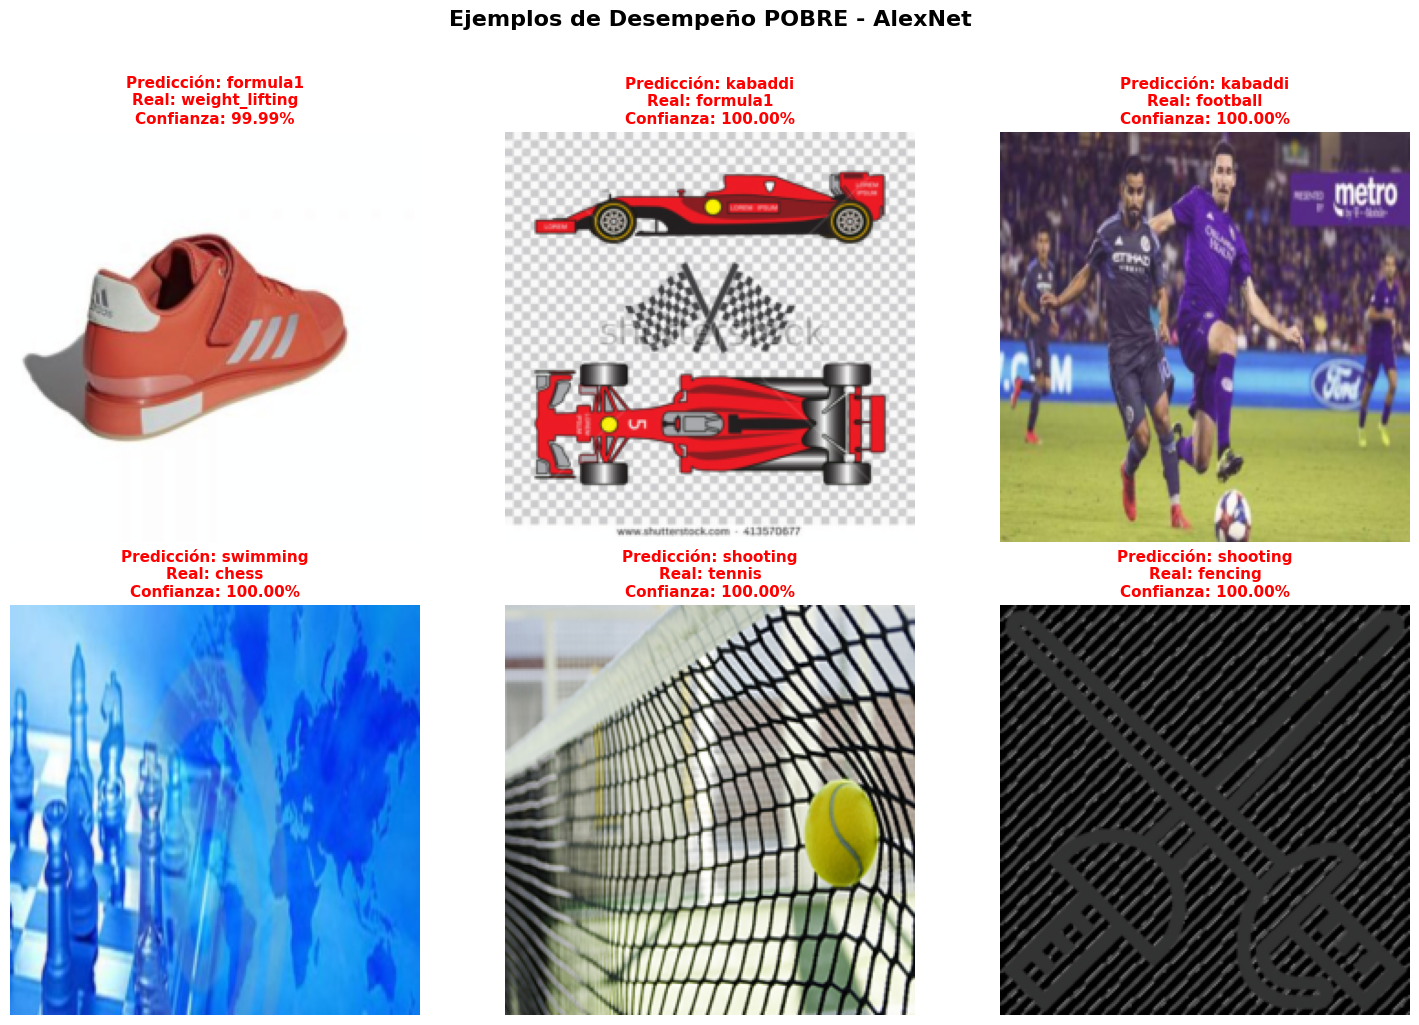

Claro que se ve un patron como el que mencione anteriormente, hay imagenes que por su coloracion o textura se confunden con otras clases, por ejemplo el kabbadi se puede confundir con futbol por la posicion de los jugadores, esa fotografía de lift weighting desde mi punto de vista no repsenta su etiqueta, es solo un tennis y como es rojo y blanco puede asociarlo con la F1 para proceder podria:
- Hacer una revisión manual de las imagenes mal clasificadas para ver si hay un mal etiquetado.
- Analizar estadisticamente las imagenes mal clasificadas para ver si hay algun patron en sus caracteristicas (brillo, contraste, color, textura, etc).
- Aumentar el conjunto de datos con imagenes similares a las mal clasificadas para mejorar el entendimiento del modelo.

f) ¿Ha identificado un repositorio con un modelo entrenado que pueda utilizar? Si es así, realice la implementación y muestre una comparación.

In [1]:
import os
import kagglehub
import glob

path = kagglehub.dataset_download("rishikeshkonapure/sports-image-dataset")

# Cambia 'images' por 'data' para buscar en todas las carpetas de deportes
imagenes_dir = os.path.join(path, "data")

# Buscar todas las imágenes jpg en todos los subdirectorios
imagenes = glob.glob(os.path.join(imagenes_dir, "**", "*.jpg"), recursive=True)

print(f"Total de imágenes encontradas: {len(imagenes)}")

Total de imágenes encontradas: 12991


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from collections import Counter

# Configuración de dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Hiperparámetros
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
TRAIN_SPLIT = 0.8

# Transformaciones para las imágenes (con resize incluido)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Carga del dataset desde el directorio de Kaggle (imagenes_dir ya definido antes)
print(f'Cargando dataset desde: {imagenes_dir}')

dataset = datasets.ImageFolder(root=imagenes_dir, transform=transform)
print(f'Total de imágenes: {len(dataset)}')
print(f'Clases: {dataset.classes}')
print(f'Número de clases: {len(dataset.classes)}')

# División estratificada en entrenamiento y prueba (balance perfecto por clase)
targets = [label for _, label in dataset.samples]
indices = list(range(len(dataset)))

train_indices, test_indices = train_test_split(
    indices, 
    test_size=1-TRAIN_SPLIT, 
    stratify=targets, 
    random_state=42
)

# Crear subsets balanceados
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(f'\nTamaño del conjunto de entrenamiento: {len(train_indices)}')
print(f'Tamaño del conjunto de prueba: {len(test_indices)}')

Usando dispositivo: cuda
Cargando dataset desde: C:\Users\sergi\.cache\kagglehub\datasets\rishikeshkonapure\sports-image-dataset\versions\1\data
Total de imágenes: 14149
Clases: ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']
Número de clases: 22

Tamaño del conjunto de entrenamiento: 11319
Tamaño del conjunto de prueba: 2830


In [3]:
# --- Data Augmentation: aplicar solo al conjunto de entrenamiento ---
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),  # zoom_range=0.5 equivalente
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),  # vertical_flip añadido
    transforms.RandomRotation(degrees=40),  # rotation_range=40
    transforms.RandomAffine(degrees=0, translate=(0.3, 0.2)),  # width/height shift
    transforms.ColorJitter(brightness=(0.2, 1.0), contrast=0.2, saturation=0.2, hue=0.05),  # brightness_range ajustado
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Para validación / test: determinista (solo resize y normalización)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Reconstruir datasets con las nuevas transformaciones desde el directorio de Kaggle
train_folder = datasets.ImageFolder(root=imagenes_dir, transform=train_transform)
test_folder = datasets.ImageFolder(root=imagenes_dir, transform=test_transform)

# Usar los mismos índices estratificados que calculamos anteriormente
train_dataset = Subset(train_folder, train_indices)
test_dataset = Subset(test_folder, test_indices)

# Actualizar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print('\n>> Data augmentation aplicado: train_transform definido con Resize, RandomResizedCrop, RandomHorizontalFlip y ColorJitter')

print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
print(f"Dataset cargado desde: {imagenes_dir}")


>> Data augmentation aplicado: train_transform definido con Resize, RandomResizedCrop, RandomHorizontalFlip y ColorJitter
Train samples: 11319, Test samples: 2830
Dataset cargado desde: C:\Users\sergi\.cache\kagglehub\datasets\rishikeshkonapure\sports-image-dataset\versions\1\data



=== Estadísticas usando DataLoaders (muestras con transforms aplicadas) ===
Estadística          Train        Test         Drift Absoluto  Drift %   
--------------------------------------------------------------------------------
mean_r               0.201319     0.450829     0.249510        123.9376  
mean_g               0.194017     0.439190     0.245173        126.3665  
mean_b               0.187057     0.421824     0.234767        125.5059  
std_r                0.177292     0.244122     0.066830        37.6947   
std_g                0.167327     0.226756     0.059428        35.5162   
std_b                0.163185     0.226976     0.063791        39.0911   

Drift promedio (loader): 81.3520%
Drift máximo (loader): 126.3665%

Mostrando 12 imágenes aumentadas de ejemplo (train)
Estadística          Train        Test         Drift Absoluto  Drift %   
--------------------------------------------------------------------------------
mean_r               0.201319     0.450829     0

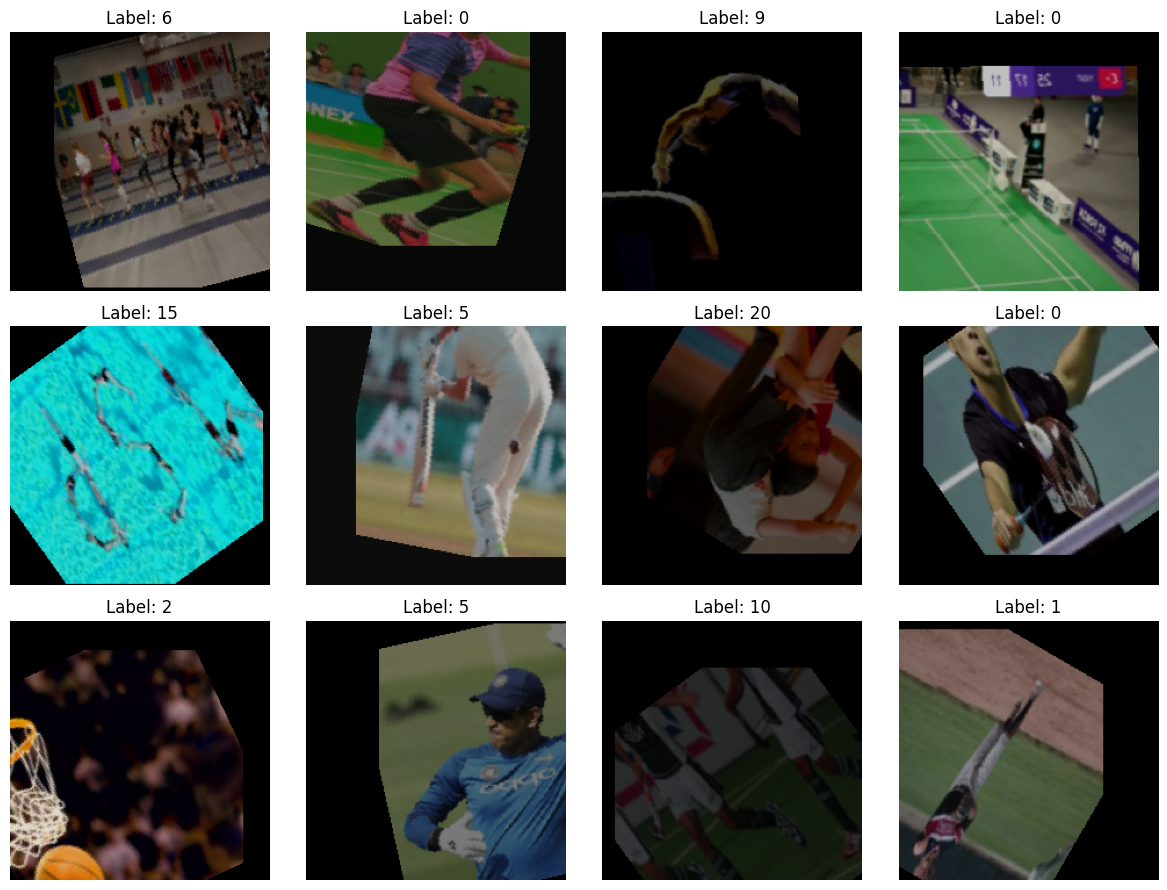

In [4]:
# === Estadísticas desde DataLoaders (incluye augmentations en train) ===
print('\n=== Estadísticas usando DataLoaders (muestras con transforms aplicadas) ===')

def compute_loader_stats(loader, n_batches=50):
    """Calcula media y std por canal a partir de batches del loader.
    Se des-normaliza cada batch antes de calcular estadísticas para obtener valores en [0,1].
    """
    means_r, means_g, means_b = [], [], []
    stds_r, stds_g, stds_b = [], [], []
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    batches = 0

    for images, _ in loader:
        imgs = images.cpu().numpy()  # (B, C, H, W)
        imgs = np.transpose(imgs, (0, 2, 3, 1))  # (B, H, W, C)
        # Des-normalizar: x = x * std + mean
        imgs = imgs * std + mean
        imgs = np.clip(imgs, 0.0, 1.0)

        # calular por imagen
        for im in imgs:
            means_r.append(im[:, :, 0].mean())
            means_g.append(im[:, :, 1].mean())
            means_b.append(im[:, :, 2].mean())
            stds_r.append(im[:, :, 0].std())
            stds_g.append(im[:, :, 1].std())
            stds_b.append(im[:, :, 2].std())

        batches += 1
        if batches >= n_batches:
            break

    return {
        'mean_r': np.mean(means_r), 'mean_g': np.mean(means_g), 'mean_b': np.mean(means_b),
        'std_r': np.mean(stds_r), 'std_g': np.mean(stds_g), 'std_b': np.mean(stds_b)
    }

# Calcular estadísticas a partir de los loaders (train con augmentations, test sin augmentations)
train_loader_stats = compute_loader_stats(train_loader, n_batches=50)
test_loader_stats = compute_loader_stats(test_loader, n_batches=50)

# Mostrar tabla comparativa
print(f"{'Estadística':<20} {'Train':<12} {'Test':<12} {'Drift Absoluto':<15} {'Drift %':<10}")
print('-' * 80)
for stat in ['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']:
    t = train_loader_stats[stat]
    s = test_loader_stats[stat]
    drift_abs = abs(t - s)
    drift_pct = 100 * drift_abs / (t + 1e-10)
    print(f"{stat:<20} {t:<12.6f} {s:<12.6f} {drift_abs:<15.6f} {drift_pct:<10.4f}")

all_drifts = [abs(train_loader_stats[s] - test_loader_stats[s]) / (train_loader_stats[s] + 1e-10) * 100 
              for s in train_loader_stats.keys()]
print(f"\nDrift promedio (loader): {np.mean(all_drifts):.4f}%")
print(f"Drift máximo (loader): {np.max(all_drifts):.4f}%")

# Mostrar algunas imágenes aumentadas (des-normalizadas) para inspección
print('\nMostrando 12 imágenes aumentadas de ejemplo (train)')
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

batch = next(iter(train_loader))
imgs, labels = batch
imgs = imgs[:12]  # tomar hasta 12
imgs = imgs.cpu().numpy()
imgs = np.transpose(imgs, (0, 2, 3, 1))
imgs = imgs * std + mean
imgs = np.clip(imgs, 0, 1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= imgs.shape[0]:
        ax.axis('off')
        continue
    ax.imshow(imgs[i])
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()




=== Distribución de Clases ===
Clase                Train      Test       Train %    Test %     Drift %   
--------------------------------------------------------------------------------
badminton            734        183        6.48       6.47       0.0182    
baseball             577        144        5.10       5.09       0.0093    
basketball           385        96         3.40       3.39       0.0091    
boxing               556        139        4.91       4.91       0.0004    
chess                374        94         3.30       3.32       0.0174    
cricket              525        131        4.64       4.63       0.0092    
fencing              492        123        4.35       4.35       0.0004    
football             621        155        5.49       5.48       0.0093    
formula1             534        134        4.72       4.73       0.0173    
gymnastics           563        141        4.97       4.98       0.0084    
hockey               447        112        3.95    

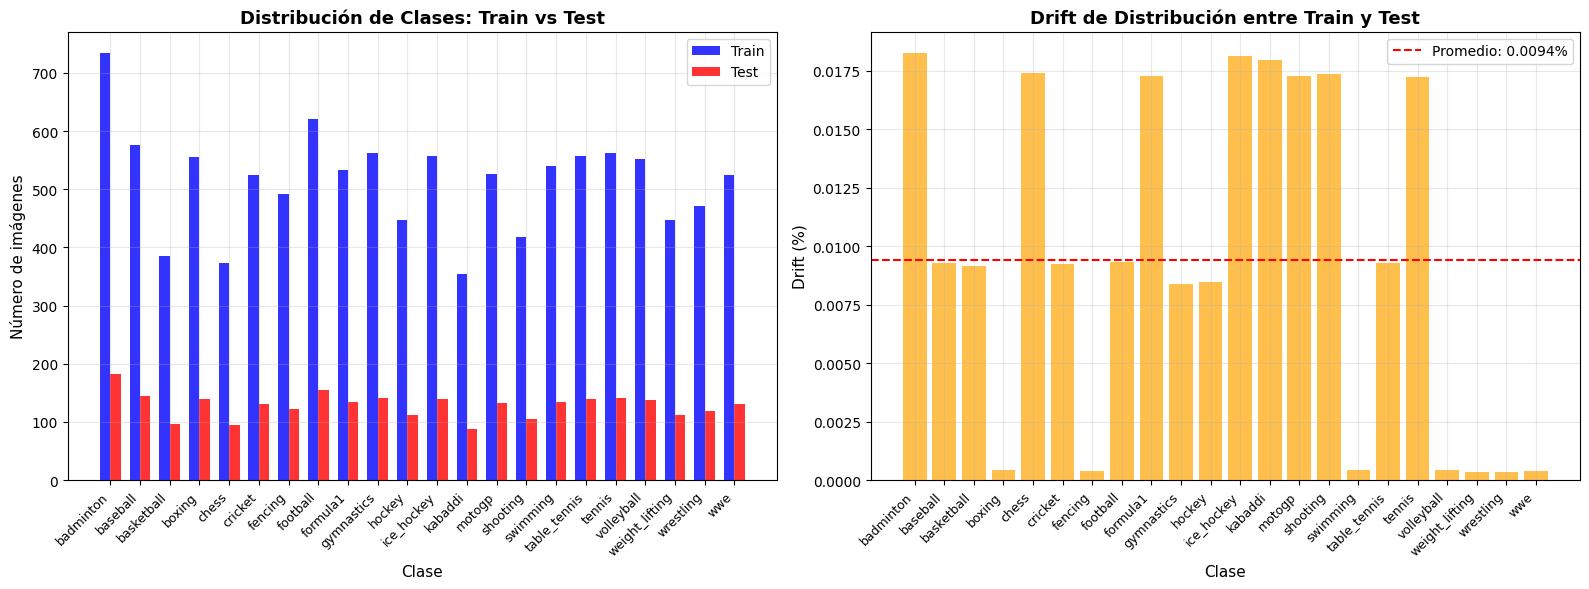

In [5]:

train_labels = [targets[i] for i in train_indices]
test_labels = [targets[i] for i in test_indices]

# Contar clases
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print('\n=== Distribución de Clases ===')
print(f'{"Clase":<20} {"Train":<10} {"Test":<10} {"Train %":<10} {"Test %":<10} {"Drift %":<10}')
print('-' * 80)

drifts = []
for i, class_name in enumerate(dataset.classes):
    train_count = train_counts[i]
    test_count = test_counts[i]
    train_pct = 100 * train_count / len(train_labels)
    test_pct = 100 * test_count / len(test_labels)
    drift = abs(train_pct - test_pct)
    drifts.append(drift)
    print(f'{class_name:<20} {train_count:<10} {test_count:<10} {train_pct:<10.2f} {test_pct:<10.2f} {drift:<10.4f}')

print(f'\nDrift promedio: {np.mean(drifts):.4f}%')
print(f'Drift máximo: {np.max(drifts):.4f}%')

# Visualización de la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de barras comparativa
x = np.arange(len(dataset.classes))
width = 0.35

ax1.bar(x - width/2, [train_counts[i] for i in range(len(dataset.classes))], 
        width, label='Train', alpha=0.8, color='blue')
ax1.bar(x + width/2, [test_counts[i] for i in range(len(dataset.classes))], 
        width, label='Test', alpha=0.8, color='red')
ax1.set_xlabel('Clase', fontsize=11)
ax1.set_ylabel('Número de imágenes', fontsize=11)
ax1.set_title('Distribución de Clases: Train vs Test', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica de drift
ax2.bar(x, drifts, color='orange', alpha=0.7)
ax2.set_xlabel('Clase', fontsize=11)
ax2.set_ylabel('Drift (%)', fontsize=11)
ax2.set_title('Drift de Distribución entre Train y Test', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax2.axhline(y=np.mean(drifts), color='r', linestyle='--', label=f'Promedio: {np.mean(drifts):.4f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
MODEL_TYPE = 'alexnet'     # Opciones: 'vgg16' o 'alexnet'
USE_PRETRAINED = True    # True: Usar pesos de ImageNet | False: Entrenar desde cero
FREEZE_FIRST_N = 11      # Número de capas a congelar (0 = todas entrenables, -1 = congelar features completo)

import torch
import torch.nn as nn
import torchvision.models as models

print(f'\n=== Configuración del Modelo ===')
print(f'Tipo de Modelo: {MODEL_TYPE.upper()}')
print(f'Pesos Pre-entrenados (ImageNet): {"SÍ" if USE_PRETRAINED else "NO"}')
print(f'Congelar primeras {FREEZE_FIRST_N} capas: {"SÍ" if FREEZE_FIRST_N > 0 else "NO (Fine-tuning completo)"}')

# 1. Cargar el modelo base
if MODEL_TYPE.lower() == 'vgg16':
    weights = models.VGG16_Weights.IMAGENET1K_V1 if USE_PRETRAINED else None
    model = models.vgg16(weights=weights)
    
    # Reemplazar el clasificador completo con dropout personalizado (0.3 y 0.5)
    model.classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),
        nn.ReLU(True),
        nn.Dropout(0.3),  # Dropout 1
        nn.Linear(4096, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),  # Dropout 2
        nn.Linear(4096, len(dataset.classes))
    )

elif MODEL_TYPE.lower() == 'alexnet':
    weights = models.AlexNet_Weights.IMAGENET1K_V1 if USE_PRETRAINED else None
    model = models.alexnet(weights=weights)
    
    # Reemplazar el clasificador con dropout personalizado
    model.classifier = nn.Sequential(
        nn.Dropout(0.3),
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, len(dataset.classes))
    )

else:
    raise ValueError(f"Modelo no soportado: {MODEL_TYPE}")

# 2. Congelar capas según configuración (Fine-tuning)
if USE_PRETRAINED and FREEZE_FIRST_N >= 0:
    # Listar todas las capas de features
    features_layers = list(model.features.children())
    
    if FREEZE_FIRST_N == -1:
        # Congelar todas las capas de features
        for param in model.features.parameters():
            param.requires_grad = False
        print(f">> Todas las capas de características congeladas.")
    elif FREEZE_FIRST_N > 0:
        # Congelar las primeras FREEZE_FIRST_N capas
        for i, layer in enumerate(features_layers):
            if i < FREEZE_FIRST_N:
                for param in layer.parameters():
                    param.requires_grad = False
        print(f">> Primeras {FREEZE_FIRST_N} capas congeladas (bloques 1-3).")
        print(f">> Capas {FREEZE_FIRST_N}+ entrenables (bloques 4-5 + clasificador).")

# Mostrar estado de cada capa
print(f'\n=== Estado de Capas (VGG16) ===')
for i, layer in enumerate(model.features.children()):
    trainable = any(p.requires_grad for p in layer.parameters()) if list(layer.parameters()) else False
    print(f'{i:2d} {layer.__class__.__name__:20s} Trainable: {trainable}')

model = model.to(device)

# 3. Resumen de parámetros
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f'\n=== Resumen de Parámetros ===')
print(f'Total: {total_params:,}')
print(f'Entrenables: {trainable_params:,}')
print(f'Congelados: {frozen_params:,}')


=== Configuración del Modelo ===
Tipo de Modelo: ALEXNET
Pesos Pre-entrenados (ImageNet): SÍ
Congelar primeras 11 capas: SÍ
>> Primeras 11 capas congeladas (bloques 1-3).
>> Capas 11+ entrenables (bloques 4-5 + clasificador).

=== Estado de Capas (VGG16) ===
 0 Conv2d               Trainable: False
 1 ReLU                 Trainable: False
 2 MaxPool2d            Trainable: False
 3 Conv2d               Trainable: False
 4 ReLU                 Trainable: False
 5 MaxPool2d            Trainable: False
 6 Conv2d               Trainable: False
 7 ReLU                 Trainable: False
 8 Conv2d               Trainable: False
 9 ReLU                 Trainable: False
10 Conv2d               Trainable: False
11 ReLU                 Trainable: False
12 MaxPool2d            Trainable: False

=== Resumen de Parámetros ===
Total: 57,093,974
Entrenables: 54,624,278
Congelados: 2,469,696
>> Primeras 11 capas congeladas (bloques 1-3).
>> Capas 11+ entrenables (bloques 4-5 + clasificador).

=== Estad

In [14]:
# Configuración de entrenamiento

# Hiperparámetros
BATCH_SIZE = 32
NUM_EPOCHS = 150 
LEARNING_RATE = 1e-4  

# Función de pérdida y optimizador con regularización L2
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

# Calcular class weights para compensar desbalance
from collections import Counter
train_labels = [targets[i] for i in train_indices]
class_counts = Counter(train_labels)
max_count = float(max(class_counts.values()))
class_weights_dict = {class_id: max_count / num_images for class_id, num_images in class_counts.items()}
class_weights_tensor = torch.tensor([class_weights_dict[i] for i in range(len(dataset.classes))], dtype=torch.float32).to(device)

# Actualizar criterion con class weights
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)


from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy

# Learning Rate Scheduler: reduce LR cuando test loss no mejora
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',           # minimizar test_loss
    factor=0.5,           # reducir LR a la mitad
    patience=8,           # esperar 8 épocas sin mejora
    verbose=True,         # imprimir cuando se reduzca LR
    min_lr=1e-7           # LR mínimo
)

# Checkpointing: guardar mejor modelo (por test_accuracy)
best_test_acc = 0.0
best_model_wts = copy.deepcopy(model.state_dict())
best_epoch = 0
save_best_path = f'{MODEL_TYPE}_best_checkpoint.pth'


early_stopping_patience = 15  # detener después de 15 épocas sin mejora
no_improve_epochs = 0

print(f'\\n=== Configuración de Entrenamiento ===')
print(f'Modelo: {MODEL_TYPE.upper()} (Pre-entrenado: {"SÍ" if USE_PRETRAINED else "NO"}, Congelado: {"SÍ" if FREEZE_FEATURES else "NO"})')
print(f'Batch size: {BATCH_SIZE}')
print(f'Épocas: {NUM_EPOCHS}')
print(f'Learning rate: {LEARNING_RATE}')
print(f'Optimizador: Adam con weight_decay=0')
print(f'Función de pérdida: CrossEntropyLoss con class weights')
print(f'\\n=== Mejoras Aplicadas ===')
print(f'✓ ReduceLROnPlateau: factor=0.5, patience=8')
print(f'✓ Checkpointing: guardando mejor modelo en {save_best_path}')
print(f'✓ Early Stopping: patience={early_stopping_patience} épocas')

\n=== Configuración de Entrenamiento ===
Modelo: ALEXNET (Pre-entrenado: SÍ, Congelado: SÍ)
Batch size: 32
Épocas: 150
Learning rate: 0.0001
Optimizador: Adam con weight_decay=0
Función de pérdida: CrossEntropyLoss con class weights
\n=== Mejoras Aplicadas ===
✓ ReduceLROnPlateau: factor=0.5, patience=8
✓ Checkpointing: guardando mejor modelo en alexnet_best_checkpoint.pth
✓ Early Stopping: patience=15 épocas


c:\Users\sergi\Documents\AdvNNs\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

Usando dispositivo: cuda


In [ ]:

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

print(f'\n=== Iniciando Entrenamiento de {MODEL_TYPE} ===')
print(f'Total de épocas: {NUM_EPOCHS}')
print(f'Entrenamiento en: {device}\n')

start_time = time.time()

for epoch in range(NUM_EPOCHS):
    epoch_start = time.time()
    
    # ========== FASE DE ENTRENAMIENTO ==========
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass y optimización
        loss.backward()
        optimizer.step()
        
        # Estadísticas
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (batch_idx + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}, Acc: {100*correct/total:.2f}%')
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    epoch_time = time.time() - epoch_start

    # ========== SCHEDULER: reducir LR si test_loss no mejora ==========
    scheduler.step(test_loss)
    
    # ========== CHECKPOINTING: guardar mejor modelo ==========
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        best_epoch = epoch + 1
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save({
            'epoch': best_epoch,
            'model_state_dict': best_model_wts,
            'optimizer_state_dict': optimizer.state_dict(),
            'test_accuracy': best_test_acc,
            'test_loss': test_loss,
            'train_accuracy': train_accuracy,
            'train_loss': train_loss,
            'class_names': dataset.classes,
            'model_type': MODEL_TYPE
        }, save_best_path)
        no_improve_epochs = 0
        print(f'✓ Nuevo mejor modelo guardado: Test Acc = {best_test_acc:.2f}% (época {best_epoch})')
    else:
        no_improve_epochs += 1

    # Mostrar progreso cada época
    print(f'\n{"="*80}')
    print(f'Época [{epoch+1}/{NUM_EPOCHS}] Completada')
    print(f'{"="*80}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}%')
    print(f'Test Loss:  {test_loss:.4f} | Test Acc:  {test_accuracy:.2f}%')
    print(f'Gap (Overfitting): {train_accuracy - test_accuracy:.2f}%')
    print(f'Mejor Test Acc hasta ahora: {best_test_acc:.2f}% (época {best_epoch})')
    print(f'Épocas sin mejora: {no_improve_epochs}/{early_stopping_patience}')
    print(f'Learning Rate actual: {optimizer.param_groups[0]["lr"]:.2e}')
    print(f'Tiempo de época: {epoch_time:.2f}s')
    print(f'{"="*80}\n')
    
    # ========== EARLY STOPPING ==========
    if no_improve_epochs >= early_stopping_patience:
        print(f'\n{"!"*80}')
        print(f'{"EARLY STOPPING ACTIVADO":^80}')
        print(f'{"!"*80}')
        print(f'No se observó mejora en Test Accuracy durante {early_stopping_patience} épocas consecutivas.')
        print(f'Deteniendo entrenamiento en época {epoch+1}.')
        print(f'Mejor modelo: época {best_epoch} con Test Acc = {best_test_acc:.2f}%')
        print(f'{"!"*80}\n')
        break

total_time = time.time() - start_time

# Cargar mejor modelo para evaluación final
print(f'\n{"*"*80}')
print(f'Cargando mejor modelo (época {best_epoch}) para evaluación final...')
model.load_state_dict(best_model_wts)
print(f'{"*"*80}\n')

print(f'\n{"#"*80}')
print(f'{"ENTRENAMIENTO COMPLETADO":^80}')
print(f'{"#"*80}')
print(f'Tiempo total: {total_time/60:.2f} minutos ({total_time:.2f} segundos)')
print(f'Épocas completadas: {len(train_losses)}')
print(f'Mejor Test Accuracy: {best_test_acc:.2f}% (época {best_epoch})')
print(f'Precisión final de entrenamiento: {train_accuracies[-1]:.2f}%')
print(f'Precisión final de prueba: {test_accuracies[-1]:.2f}%')
print(f'Gap final: {train_accuracies[-1] - test_accuracies[-1]:.2f}%')
print(f'{"#"*80}\n')


=== Iniciando Entrenamiento de alexnet ===
Total de épocas: 150
Entrenamiento en: cuda

Epoch [1/150], Step [50/354], Loss: 2.4894, Acc: 14.31%
Epoch [1/150], Step [50/354], Loss: 2.4894, Acc: 14.31%
Epoch [1/150], Step [100/354], Loss: 1.8988, Acc: 20.25%
Epoch [1/150], Step [100/354], Loss: 1.8988, Acc: 20.25%
Epoch [1/150], Step [150/354], Loss: 2.2152, Acc: 24.54%
Epoch [1/150], Step [150/354], Loss: 2.2152, Acc: 24.54%
Epoch [1/150], Step [200/354], Loss: 2.6967, Acc: 27.34%
Epoch [1/150], Step [200/354], Loss: 2.6967, Acc: 27.34%
Epoch [1/150], Step [250/354], Loss: 2.8061, Acc: 29.18%
Epoch [1/150], Step [250/354], Loss: 2.8061, Acc: 29.18%
Epoch [1/150], Step [300/354], Loss: 2.1684, Acc: 30.80%
Epoch [1/150], Step [300/354], Loss: 2.1684, Acc: 30.80%
Epoch [1/150], Step [350/354], Loss: 1.8110, Acc: 32.09%
Epoch [1/150], Step [350/354], Loss: 1.8110, Acc: 32.09%
✓ Nuevo mejor modelo guardado: Test Acc = 56.22% (época 1)

Época [1/150] Completada
Train Loss: 2.2545 | Train Acc